In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fft import fft, ifft
from scipy.integrate import quad as integrate
import scipy 

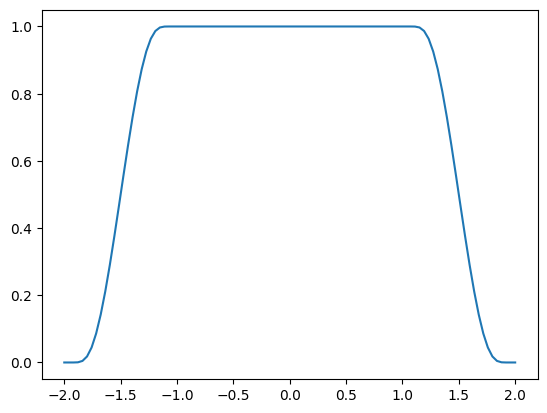

In [50]:
L = 2
chi = 1
psi = 2
x = np.linspace(-psi, psi, 100) 

# Asymptotic Fourier Coefficients for a C ∞ Bell
#(Smoothed-“Top-Hat”) & the Fourier Extension
#Problem
#John P. Boyd 1

#Eq. 2
def erflike(x, L):
    if x <= -1:
        return -1
    elif x >= 1:
        return  1
    else:
        return scipy.special.erf(L * x / np.sqrt(1 - x**2))

#Eq. 3
def ramp(x, L):
    return 0.5 * (1 + erflike(x, L))

#Eq. 5
def bell(x, L, chi, psi): 
#   Eq. 4
    Omega = (psi - chi) / 2
    if -psi <= x and x < -chi: 
        return ramp(+(x + chi + Omega)/Omega, L)
    elif -chi <= x and x < chi: 
        return 1
    else:
        return ramp(-(x - chi - Omega)/Omega, L)
    

y = np.array([bell(r, L, chi, psi) for r in x]) 
plt.plot(x, y)


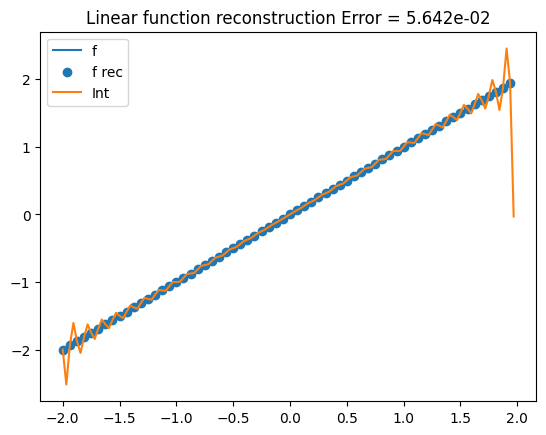

In [62]:
L  = 2 * np.pi
N  = 64
Ni = 128
x  = np.linspace(-psi, psi, N  + 1)[:-1]
xi = np.linspace(-psi, psi, Ni + 1)[:-1]

def getk(x): 
    k = np.arange(-len(x)/2, len(x)/2) / len(x)*2
    k = np.fft.ifftshift(k)
    return k 


def func(x): 
    return x

f    = func(x) 
fhat = fft(f, norm="forward")
#fhat[int(N/2)] = 0
Npad = int(Ni/2 - N/2) 
ft   = np.fft.fftshift(fhat)
fpad = np.concatenate([np.zeros(Npad), ft, np.zeros(Npad)])
fpad = np.fft.fftshift(fpad)
frec = ifft(fhat, norm="forward")
fint = ifft(fpad, norm="forward")
plt.title(f"Linear function reconstruction Error = {np.mean(np.abs(fint - func(xi))):3.3e}") 
plt.plot(x, f, label="f")
plt.scatter(x, frec, label="f rec")
plt.plot(xi, fint, label="Int")
plt.legend()
plt.show()

## The naive implementation

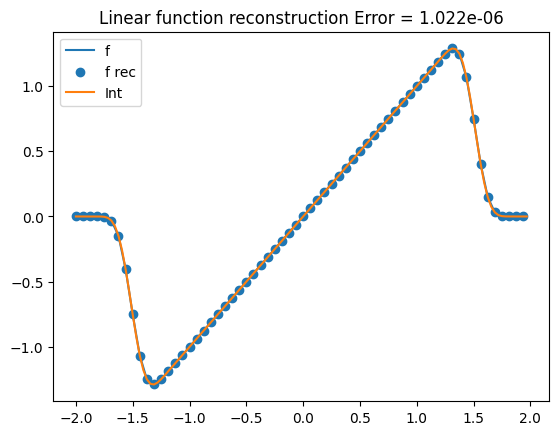

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


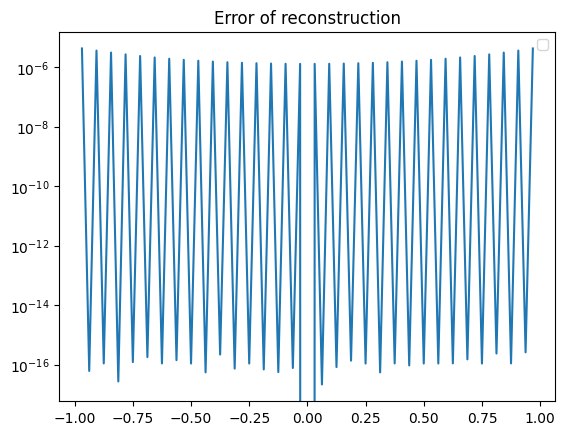

In [63]:
b = int(np.argwhere(xi>-chi)[0])
L = 0.911 * np.sqrt(1 - chi/psi) * np.sqrt(len(x)/2)
y    = np.array([bell(r, L, chi, psi) for r in x]) 
f    = func(x) * y
fhat = fft(f, norm="forward")
#fhat[int(N/2)] = 0
ft   = np.fft.fftshift(fhat)
fpad = np.concatenate([np.zeros(Npad), ft, np.zeros(Npad)])
fpad = np.fft.fftshift(fpad)
frec = ifft(fhat, norm="forward")
fint = ifft(fpad, norm="forward")
plt.title(f"Linear function reconstruction Error = {np.mean(np.abs(fint[b:-b] - func(xi)[b:-b])):3.3e}") 
plt.plot(x, f, label="f")
plt.scatter(x, frec, label="f rec")
plt.plot(xi, fint, label="Int")
plt.legend()
plt.show()


plt.title(f"Error of reconstruction") 
plt.yscale("log")
plt.plot(xi[b:-b+1], np.abs(fint[b:-b+1] - func(xi)[b:-b+1]))
plt.legend()
plt.show()

## The overlapped strategy

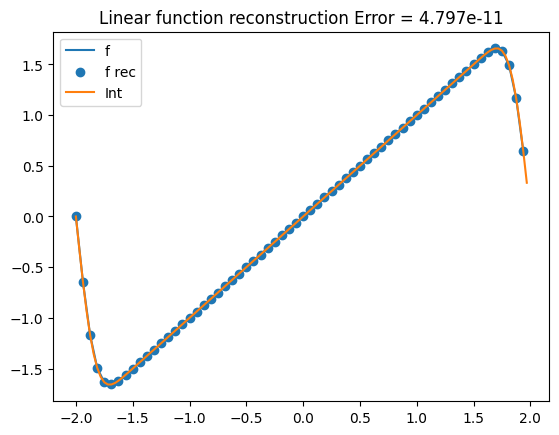

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


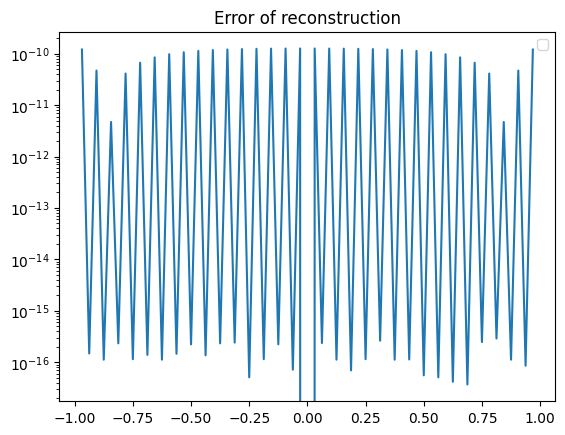

In [64]:
xs  = np.linspace(-psi, psi, N  + 1)[:-1]
L   = 1.3 * np.sqrt(1 - chi/psi) * np.sqrt(len(xs)/2)

f = np.zeros(xs.shape) 
for i, x in enumerate(xs): 
    Omega = (psi - chi) / 2
    if -psi <= x and x < -chi: 
        f[i] = bell(x, L, chi, 2 * psi - chi) * func(x) + bell(x + 2 * psi, L, chi, 2 * psi - chi) * func(x + 2 * psi)
    elif -chi <= x and x < chi: 
        f[i] = func(x) 
    else:
        f[i] = bell(x, L, chi, 2 * psi - chi) * func(x) + bell(x - 2 * psi, L, chi, 2 * psi - chi) * func(x - 2 * psi)
    
fhat = fft(f, norm="forward")
#fhat[int(N/2)] = 0
ft   = np.fft.fftshift(fhat)
fpad = np.concatenate([np.zeros(Npad), ft, np.zeros(Npad)])
fpad = np.fft.fftshift(fpad)
frec = ifft(fhat, norm="forward")
fint = ifft(fpad, norm="forward")
plt.title(f"Linear function reconstruction Error = {np.mean(np.abs(fint[b:-b] - func(xi)[b:-b])):3.3e}") 
plt.plot(xs, f, label="f")
plt.scatter(xs, frec, label="f rec")
plt.plot(xi, fint, label="Int")
plt.legend()
plt.show()


plt.title(f"Error of reconstruction") 
plt.yscale("log")
plt.plot(xi[b:-b+1], np.abs(fint[b:-b+1] - func(xi)[b:-b+1]))
plt.legend()
plt.show()